In [1]:
import matplotlib.pyplot as plt
import json

In [16]:
def extract_losses(lines):
    train_losses = []
    val_losses = []
    for line in lines:
        # if line starts with '{', it's a JSON-like log entry, parse with json.loads
        if "{" in line:
            # first, remove everything before the first '{'
            line = line[line.index("{"):]
            log_entry = json.loads(line.replace("'", '"'))
            epoch_time = log_entry.get("epoch", None)
            if "loss" in log_entry.keys():
                train_losses.append((epoch_time, log_entry["loss"]))
            elif "eval_loss" in log_entry.keys():
                val_losses.append((epoch_time, log_entry["eval_loss"]))
    return train_losses, val_losses


In [17]:
# open log file
with open("logs/train_mistral7b.log", "r", encoding="utf-8") as f:
    lines = f.readlines()

# extract loss values
train_losses, val_losses = extract_losses(lines)
print(val_losses)

[(0.24, 0.46466341614723206), (0.49, 0.5569210648536682), (0.73, 0.532214879989624), (0.98, 0.508692741394043), (1.22, 0.5187349319458008), (1.47, 0.5414125323295593), (1.71, 0.5523470640182495), (1.95, 0.5679104328155518), (2.2, 0.5822368860244751), (2.44, 0.5855062007904053), (2.69, 0.584875226020813), (2.93, 0.585116446018219)]


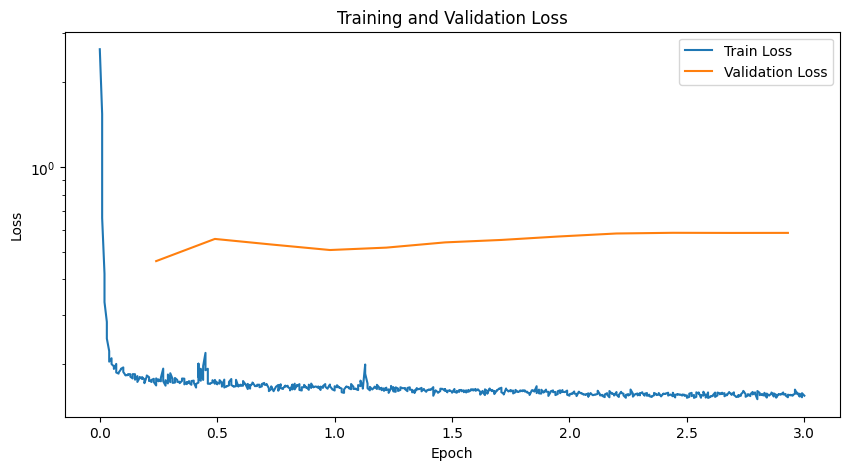

In [18]:
# plot losses
plt.figure(figsize=(10, 5))
plt.plot([x[0] for x in train_losses], [x[1] for x in train_losses], label="Train Loss")
plt.plot([x[0] for x in val_losses], [x[1] for x in val_losses], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()